In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import seaborn as sns
import re
import io
import string

from sklearn.metrics import roc_auc_score,roc_curve
from matplotlib import pyplot as plt


In [10]:
train = pd.read_csv('clean_new_train.csv')

In [11]:
train.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
0,43346,73b77bbc3fd5f2e6,listas Henke Brad William,0,0,0,0,0,0,0
1,30221,503848e8a9f376fa,Good job Its now much better referenced I move...,0,0,0,0,0,0,0
2,198074,999f2b6f546d0199,I swear I scoured the talk help pages for the ...,0,0,0,0,0,0,0
3,40765,6ccc5301a9e456da,Tax Document from Vector Marketing Hi 72Dino I...,0,0,0,0,0,0,0
4,147574,3ebba7ac63bb771e,Time to unprotect Banjo Paterson Its been thre...,0,0,0,0,0,0,0


### Exploration

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44936 entries, 0 to 44935
Data columns (total 10 columns):
Unnamed: 0       44936 non-null int64
id               44936 non-null object
comment_text     44936 non-null object
toxic            44936 non-null int64
severe_toxic     44936 non-null int64
obscene          44936 non-null int64
threat           44936 non-null int64
insult           44936 non-null int64
identity_hate    44936 non-null int64
sum              44936 non-null int64
dtypes: int64(8), object(2)
memory usage: 3.4+ MB


In [13]:
train

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
0,43346,73b77bbc3fd5f2e6,listas Henke Brad William,0,0,0,0,0,0,0
1,30221,503848e8a9f376fa,Good job Its now much better referenced I move...,0,0,0,0,0,0,0
2,198074,999f2b6f546d0199,I swear I scoured the talk help pages for the ...,0,0,0,0,0,0,0
3,40765,6ccc5301a9e456da,Tax Document from Vector Marketing Hi 72Dino I...,0,0,0,0,0,0,0
4,147574,3ebba7ac63bb771e,Time to unprotect Banjo Paterson Its been thre...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
44931,123780,9622c82f97eb26cd,She is a Motherfucker I will block you Motherf...,1,1,1,1,1,1,6
44932,29966,4f95394c7229f84c,u motherfukkin bitch i want to rape you smelly...,1,1,1,1,1,1,6
44933,38576,66f0a9006c188820,fuck you honkey why you hatin on blacks You fu...,1,1,1,1,1,1,6
44934,67240,b3e7b8a6ea14ddc5,YOURE A FRREAKING JEW AND PLEAZE COMMIT SUICIDE,1,1,1,1,1,1,6


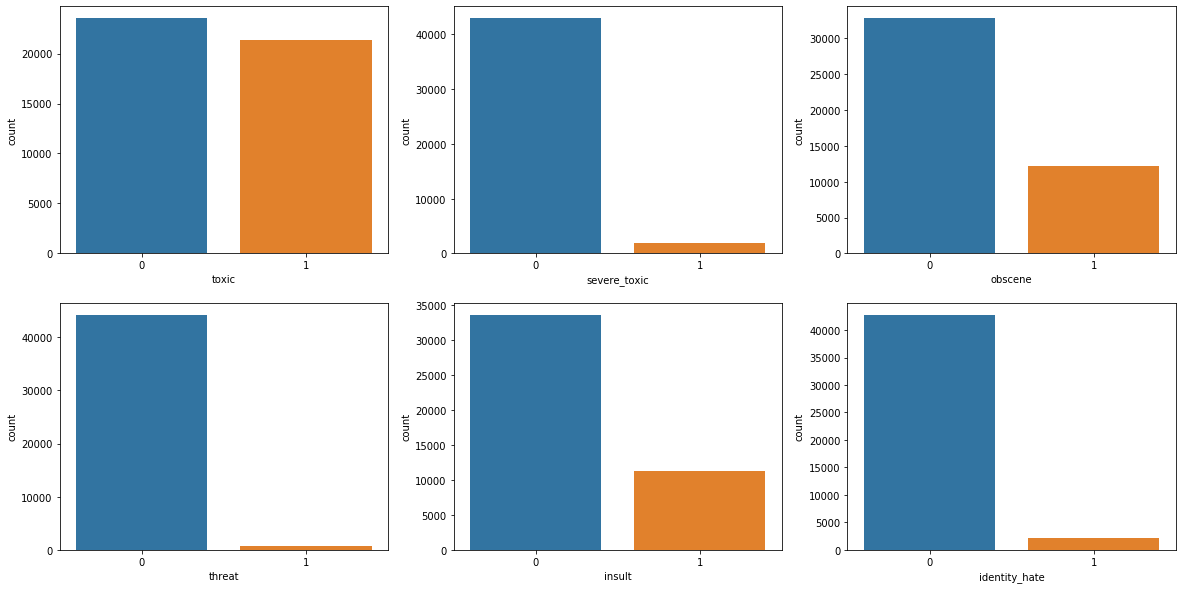

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))
# sns.set(style="darkgrid")
sns.countplot(train['toxic'],ax=axs[0,0])
sns.countplot(train['severe_toxic'],ax=axs[0,1])
sns.countplot(train['obscene'],ax=axs[0,2])
sns.countplot(train['threat'], ax = axs[1,0])
sns.countplot(train['insult'], ax=axs[1,1])
sns.countplot(train['identity_hate'],  ax = axs[1,2])

In [15]:
# sns.set(style="dark")


Text(0.5, 1.0, 'not identity_hate VS. identity_hate')

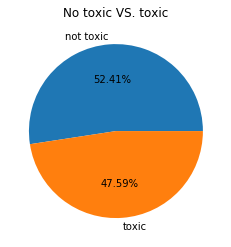

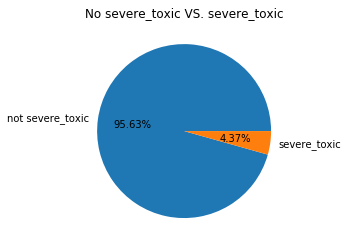

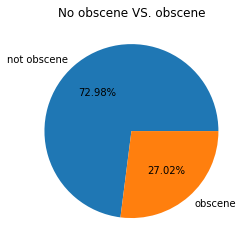

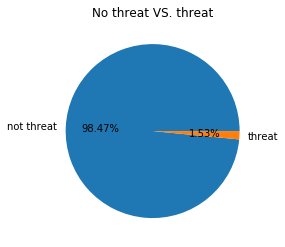

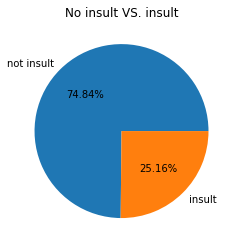

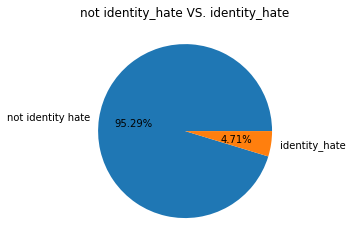

In [16]:
toxic_label = 'not toxic',"toxic"
toxic_size = [23552,21384]

severe_toxic_label = "not severe_toxic","severe_toxic"
severe_toxic_size = [42974,1962]

obscene_label = "not obscene","obscene"
obscene_size = [32796,12140]

threat_label = "not threat","threat"
threat_size = [44247,689]

insult_label = "not insult","insult"
insult_size = [33632,11304]

hate_label = "not identity hate","identity_hate"
hate_size = [42819,2117]



fig1 = plt.figure()
plt.pie(toxic_size,labels=toxic_label,autopct='%1.2f%%')
plt.title("No toxic VS. toxic")

fig2 = plt.figure()
plt.pie(severe_toxic_size,labels=severe_toxic_label,autopct='%1.2f%%')
plt.title("No severe_toxic VS. severe_toxic")

fig3 = plt.figure()
plt.pie(obscene_size,labels=obscene_label,autopct='%1.2f%%')
plt.title("No obscene VS. obscene")

fig4 = plt.figure()
plt.pie(threat_size,labels=threat_label,autopct='%1.2f%%')
plt.title("No threat VS. threat")

fig5 = plt.figure()
plt.pie(insult_size,labels=insult_label,autopct='%1.2f%%')
plt.title("No insult VS. insult")

fig6 = plt.figure()
plt.pie(hate_size ,labels=hate_label,autopct='%1.2f%%')
plt.title("not identity_hate VS. identity_hate")

In [17]:
# make a calculation
no =21384+1962+12140+689+11304+2117
toxic_rate = '%.2f%%' % (float(21384) / float(23552) * 100)
severe_toxic_rate = '%.2f%%' % (float(1962) / float(42974) * 100)
obscene_rate ='%.2f%%' % (float(12140) / float(32796) * 100)
threat_rate = '%.2f%%' % (float(689) / float(44247) * 100)
insult_rate ='%.2f%%' % (float(11304) / float(33632) * 100)
hate_rate = '%.2f%%' % (float(2117) / float(42819) * 100)


In [18]:
table1 = {'Type':["Toxic", 'Severe_toxic', 'Obscene', 'Threat','Insult'
                      ,'hate'], 
     'percentage':[toxic_rate, severe_toxic_rate, obscene_rate, threat_rate,insult_rate,hate_rate],}
table1 = pd.DataFrame(table1)
print(table1)

           Type percentage
0         Toxic     90.79%
1  Severe_toxic      4.57%
2       Obscene     37.02%
3        Threat      1.56%
4        Insult     33.61%
5          hate      4.94%


In [19]:
corr = train.corr()
corr

,Unnamed: 0,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
Unnamed: 0,1.000000,-0.000963,-0.036503,0.021694,0.000167,0.020134,0.023461,0.011318
toxic,-0.000963,1.000000,0.224242,0.579505,0.118267,0.544963,0.207694,0.805557
severe_toxic,-0.036503,0.224242,1.000000,0.331083,0.113375,0.303052,0.182762,0.475230
obscene,0.021694,0.579505,0.331083,1.000000,0.103134,0.673376,0.236078,0.848435
threat,0.000167,0.118267,0.113375,0.103134,1.000000,0.113397,0.096199,0.235221
insult,0.020134,0.544963,0.303052,0.673376,0.113397,1.000000,0.297601,0.839633
identity_hate,0.023461,0.207694,0.182762,0.236078,0.096199,0.297601,1.000000,0.439437
sum,0.011318,0.805557,0.475230,0.848435,0.235221,0.839633,0.439437,1.000000


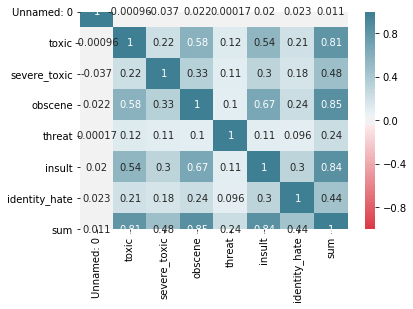

In [20]:

sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(10, 220, n=200),annot = True);

(-0.5, 999.5, 999.5, -0.5)

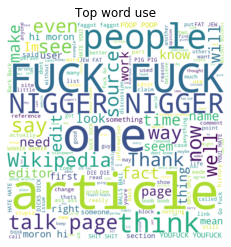

In [21]:
#getting the function splitword idea from https://www.kaggle.com/tarunpaparaju/jigsaw-multilingual-toxicity-eda-models
def split_word(word):
    if type(word) == str:
        return word.replace("\n", "")
    else:
        return word.replace("\n", "1")

text = ' '.join([split_word(word) for word in train["comment_text"]])
wordcloud =WordCloud(background_color='white',width=1000, height=1000,
                     relative_scaling= 0.2 ).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Top word use')
plt.axis("off")

### Logistic Regression - comment_text v. toxic

In [22]:
y_columns = "toxic"
x_columns= "comment_text"

#### Split

In [23]:
x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [24]:
x_train,y_train

(28982    Name change I understand The Hurt Locker has s...
 12146    I wasnt going to bother with your obvious nons...
 29982    Your wrong stupid Your Vandilising carlos slim...
 34467    If you dont think who started it is important ...
 8508     Assessment WikipediaGood article criteria Its ...
                                ...                        
 18133    Please do not remove content from pages withou...
 29705    Yes you are right i watched a video on youtube...
 7146     Ha Even the main Hunting Incident article has ...
 38602    Waiting for DragQeen Tony to ban Leatherqueen ...
 6625     Its not my fault if your ridiculous talk page ...
 Name: comment_text, Length: 35948, dtype: object, 28982    1
 12146    0
 29982    1
 34467    1
 8508     0
         ..
 18133    0
 29705    1
 7146     0
 38602    1
 6625     0
 Name: toxic, Length: 35948, dtype: int64)

In [25]:
TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

In [26]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Logistic Regression Train Error

In [27]:
y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


[[17751  1078]
 [ 1842 15277]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     18829
           1       0.93      0.89      0.91     17119

    accuracy                           0.92     35948
   macro avg       0.92      0.92      0.92     35948
weighted avg       0.92      0.92      0.92     35948



#### Logistic Regression Test Error

In [28]:
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

[[4303  420]
 [ 722 3543]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4723
           1       0.89      0.83      0.86      4265

    accuracy                           0.87      8988
   macro avg       0.88      0.87      0.87      8988
weighted avg       0.87      0.87      0.87      8988



In [29]:
#I getting this frome stackoverflow  https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels 
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

#     plt.figure(figsize=(10, 6))
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, origin = 'lower')
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

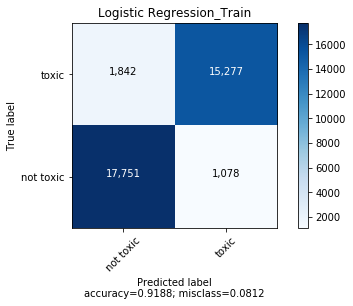

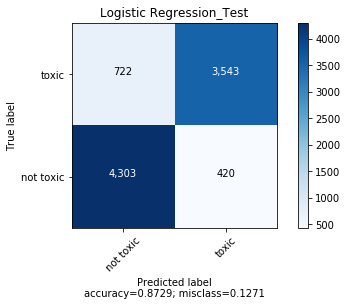

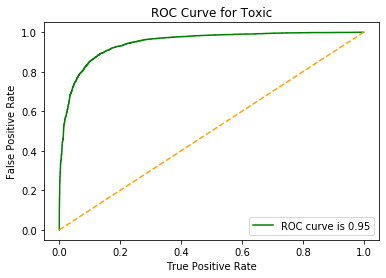

In [30]:
labels = ['not toxic', 'toxic']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)


y_prob=clf.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, y_prob)
tpr, fpr, a = roc_curve(y_test, y_prob)

plt.plot(tpr, fpr, color='green', label='ROC curve is %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Toxic')
plt.legend()

### Logistic Regression - comment_text v. severe_toxic

In [31]:
y_columns = "severe_toxic"
x_columns= "comment_text"

In [32]:
x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

[[34185   186]
 [ 1271   306]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     34371
           1       0.62      0.19      0.30      1577

    accuracy                           0.96     35948
   macro avg       0.79      0.59      0.64     35948
weighted avg       0.95      0.96      0.95     35948

[[8529   74]
 [ 305   80]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8603
           1       0.52      0.21      0.30       385

    accuracy                           0.96      8988
   macro avg       0.74      0.60      0.64      8988
weighted avg       0.95      0.96      0.95      8988



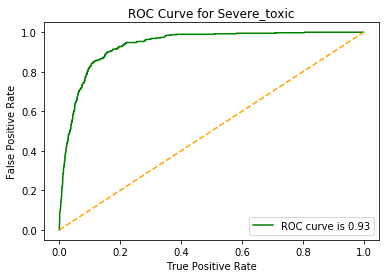

In [33]:
y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

y_prob=clf.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, y_prob)
tpr, fpr, a = roc_curve(y_test, y_prob)

plt.plot(tpr, fpr, color='green', label='ROC curve is %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Severe_toxic')
plt.legend()

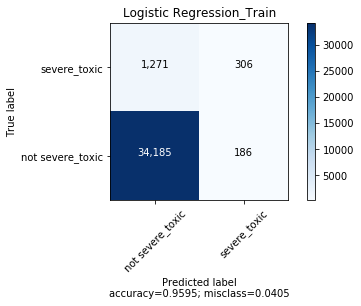

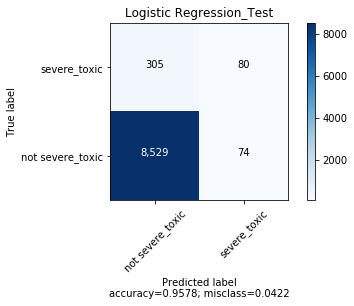

In [34]:
labels = ['not severe_toxic', 'severe_toxic']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

### Logistic Regression - comment_text v. obscene

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[25709   544]
 [ 2814  6881]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     26253
           1       0.93      0.71      0.80      9695

    accuracy                           0.91     35948
   macro avg       0.91      0.84      0.87     35948
weighted avg       0.91      0.91      0.90     35948

[[6350  193]
 [ 792 1653]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6543
           1       0.90      0.68      0.77      2445

    accuracy                           0.89      8988
   macro avg       0.89      0.82      0.85      8988
weighted avg       0.89      0.89      0.89      8988



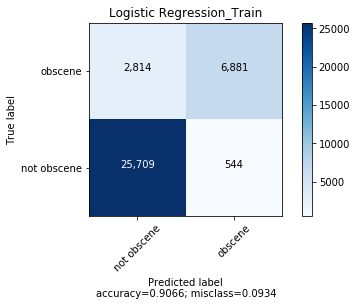

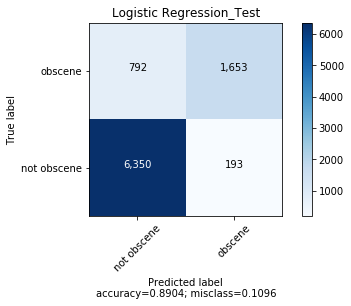

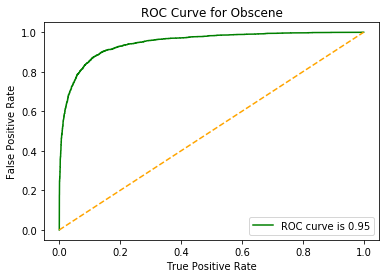

In [35]:
y_columns = "obscene"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

labels = ['not obscene', 'obscene']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

y_prob=clf.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, y_prob)
tpr, fpr, a = roc_curve(y_test, y_prob)

plt.plot(tpr, fpr, color='green', label='ROC curve is %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Obscene')
plt.legend()

### Logistic Regression - comment_text v. threat

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[35343    27]
 [  485    93]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     35370
           1       0.78      0.16      0.27       578

    accuracy                           0.99     35948
   macro avg       0.88      0.58      0.63     35948
weighted avg       0.98      0.99      0.98     35948

[[8865   12]
 [  91   20]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8877
           1       0.62      0.18      0.28       111

    accuracy                           0.99      8988
   macro avg       0.81      0.59      0.64      8988
weighted avg       0.99      0.99      0.99      8988



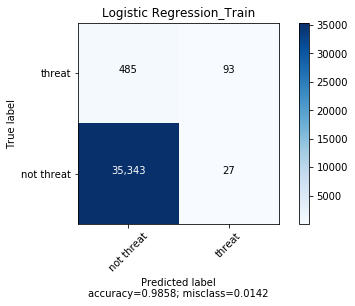

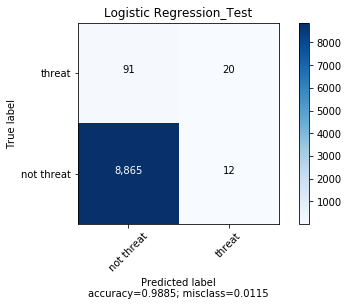

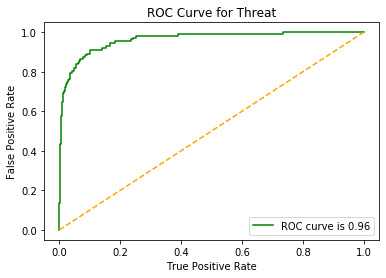

In [36]:
y_columns = "threat"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

labels = ['not threat', 'threat']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

y_prob=clf.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, y_prob)
tpr, fpr, a = roc_curve(y_test, y_prob)

plt.plot(tpr, fpr, color='green', label='ROC curve is %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Threat')
plt.legend()


### Logistic Regression - comment_text v. insult

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[26028   888]
 [ 3396  5636]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     26916
           1       0.86      0.62      0.72      9032

    accuracy                           0.88     35948
   macro avg       0.87      0.80      0.82     35948
weighted avg       0.88      0.88      0.87     35948

[[6433  283]
 [ 969 1303]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6716
           1       0.82      0.57      0.68      2272

    accuracy                           0.86      8988
   macro avg       0.85      0.77      0.79      8988
weighted avg       0.86      0.86      0.85      8988



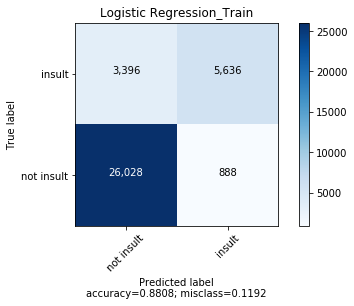

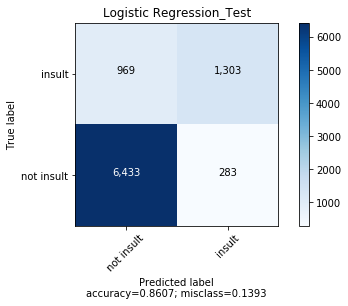

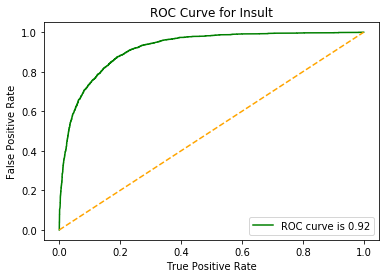

In [37]:
y_columns = "insult"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

labels = ['not insult', 'insult']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)

y_prob=clf.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, y_prob)
tpr, fpr, a = roc_curve(y_test, y_prob)

plt.plot(tpr, fpr, color='green', label='ROC curve is %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Insult')
plt.legend()

### Logistic Regression - comment_text v. identity_hate

C:\Users\13472\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[34151    96]
 [ 1272   429]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     34247
           1       0.82      0.25      0.39      1701

    accuracy                           0.96     35948
   macro avg       0.89      0.62      0.68     35948
weighted avg       0.96      0.96      0.95     35948

[[8535   37]
 [ 314  102]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8572
           1       0.73      0.25      0.37       416

    accuracy                           0.96      8988
   macro avg       0.85      0.62      0.67      8988
weighted avg       0.95      0.96      0.95      8988



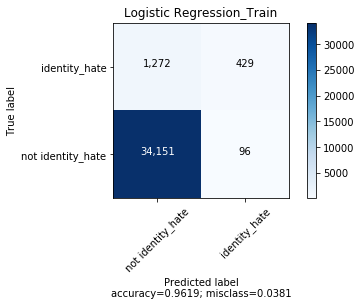

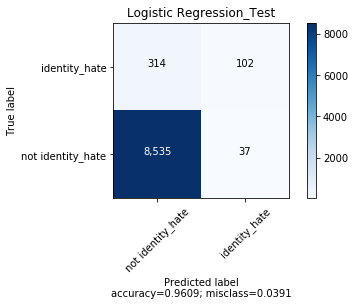

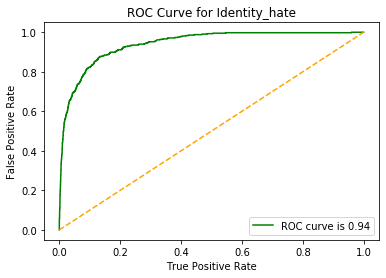

In [38]:
y_columns = "identity_hate"
x_columns= "comment_text"

x = train[x_columns]
y = train[y_columns]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

TfidfVector = TfidfVectorizer(max_df=0.7,stop_words='english')
x_train = TfidfVector.fit_transform(x_train)
x_test = TfidfVector.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

logistic_train = confusion_matrix(y_train, y_pred)
logistic_train_accuracy = accuracy_score(y_train, y_pred)


y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
logistic_test = confusion_matrix(y_test, y_pred)
logistic_test_accuracy = accuracy_score(y_test, y_pred)

labels = ['not identity_hate', 'identity_hate']
plot_confusion_matrix(logistic_train, labels, title='Logistic Regression_Train',cmap=None, normalize=False)
plot_confusion_matrix(logistic_test, labels, title='Logistic Regression_Test',cmap=None, normalize=False)


y_prob=clf.predict_proba(x_test)[:,1]
roc_auc=roc_auc_score(y_test, y_prob)
tpr, fpr, a = roc_curve(y_test, y_prob)

plt.plot(tpr, fpr, color='green', label='ROC curve is %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve for Identity_hate')
plt.legend()